# CodeBotix: EDA

## Importing the Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns

plt.rcParams['font.family'] = 'SF Mono'
plt.rcParams['font.size'] = 20
plt.figure(figsize=(40, 16))   # options: 'serif', 'sans-serif', 'monospace'

<Figure size 4000x1600 with 0 Axes>

<Figure size 4000x1600 with 0 Axes>

## Getting the Data

In [5]:
data = pd.read_csv('CodeBotixMaster.csv')
data.head(3)

,name,gender,class,mode,workshop_name,workshop_duration,interest_before,interest_after,highlights,suggestions,satisfaction,expectations,prior_experience,knowledge_gain
0,Akshita Edith,female,10th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.928610,NaN,NaN,NaN,NaN,To learn new things,0.900789,NaN
1,Gladys B,male,10th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.934968,NaN,NaN,NaN,NaN,Learning something that might help me in the f...,0.885160,NaN
2,R.p manirathan,male,12th,Online,1 hour Online intro to Robotics workshop-pilot,1 hour,0.665015,NaN,NaN,NaN,NaN,Gaining Knowledge about robotics,0.804458,NaN


## Pre Processing

#### gender

In [6]:
data.loc[:, 'gender'] = data['gender'].str.lower()
data.gender.unique()

array(['female', 'male'], dtype=object)

#### class

In [7]:
data.loc[:, 'class'] = data['class'].apply(lambda x: '9th' if (('IX' in str(x)) \
                                                               or ('9' in str(x)) \
                                                                 or ('x' in str(x))) \
                                                                    else str(x))
data['class'].unique()

array(['10th', '12th', '6th', '9th', '8th', '7th', 'nan', 'university',
       '11th'], dtype=object)

In [8]:
pd.Series(data.columns)

0                  name
1                gender
2                 class
3                  mode
4         workshop_name
5     workshop_duration
6       interest_before
7        interest_after
8            highlights
9           suggestions
10         satisfaction
11         expectations
12     prior_experience
13       knowledge_gain
dtype: object

In [9]:
for col in data.columns:
    print(col)

name
gender
class
mode
workshop_name
workshop_duration
interest_before
interest_after
highlights
suggestions
satisfaction
expectations
prior_experience
knowledge_gain


## EDA

In [11]:
data.to_csv('CodeBotix_All_Workshops_Complied_Interpreted_Data.csv', index=False)

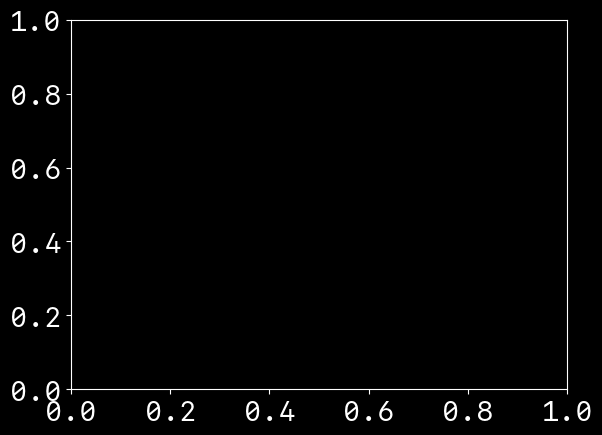

In [ ]:
fig, ax = plt.subplots()

#### Interest Before v/s Gender

In [ ]:
data.query('gender == "female"')['interest_before']
sns.set_palette(["#d6ff3f"]) 

In [ ]:
sns.boxplot(x='gender', y='interest_before', data=data, ax=ax, color="#d6ff3f")
ax.set_xlabel('')
ax.set_ylabel('')

Text(39.66666666666667, 0.5, '')

In [92]:
fig.savefig('InterestBeforeByGender.png', dpi=300, transparent=True)

In [93]:
data[~data['interest_before'].isna()]\
    .query('gender == "female"')['interest_before'].count()

np.int64(116)

#### Interest Change

In [94]:
dataWithInterestVals = data[(~data['interest_before'].isna()) & (~data['interest_after'].isna())]

In [95]:
interestChange = dataWithInterestVals.interest_after - dataWithInterestVals.interest_before
(pd.Series([(interestChange > 0).sum(), (interestChange < 0).sum()], index=['increased', 'decreased'], name='Count of Interest Change')/dataWithInterestVals.shape[0]) * 100

increased    92.638037
decreased     7.361963
Name: Count of Interest Change, dtype: float64

In [96]:
(((dataWithInterestVals.interest_after - dataWithInterestVals.interest_before).div(dataWithInterestVals.interest_before))).mean()

np.float64(1.5419802074579527)

Text(0.5, 0, '')

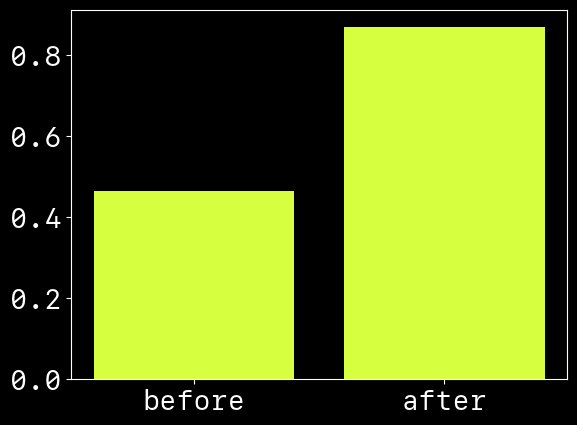

In [99]:
intBefore = dataWithInterestVals.interest_before.mean()
intAfter = dataWithInterestVals.interest_after.mean()
fig, axs = plt.subplots(1)
axs = plt.bar(['before', 'after'], [intBefore, intAfter])
plt.ylabel('')
plt.xlabel('')

In [100]:
fig.savefig('InterestChange.png', dpi=300, transparent=True, bbox_inches='tight')

#### satisfaction v/s workshop type

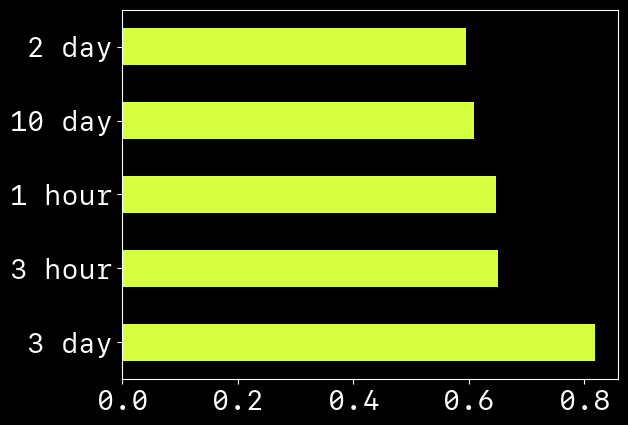

In [180]:
fig, ax = plt.subplots()
data.groupby(['workshop_duration'])['satisfaction'].agg(['mean']).sort_values('mean', ascending=False).plot(kind='barh', xlabel='sqatisfaction_confidence', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend().remove()

In [181]:
fig.savefig('SatisfactionByDuration.png', dpi=300, transparent=True, bbox_inches='tight')

#### Int Change v/s prior experience

In [104]:
dataWithPriorExp = data[(~data['prior_experience'].isna())]
priorExpQ1 = np.quantile(dataWithPriorExp.prior_experience, 0.25)
priorExpQ2 = np.quantile(dataWithPriorExp.prior_experience, 0.50)
priorExpQ3 = np.quantile(dataWithPriorExp.prior_experience, 0.75)

In [105]:
priorExpBins = [dataWithPriorExp.prior_experience.min(), priorExpQ1, priorExpQ2, priorExpQ3, dataWithPriorExp.prior_experience.max()]

In [106]:
dataWithPriorExp.loc[:, '_interest_change'] = dataWithPriorExp.interest_after - dataWithPriorExp.interest_before
dataWithPriorExp.loc[:, '_experience_category'] = pd.cut(dataWithPriorExp.prior_experience, bins=priorExpBins, labels=['very low', 'low', 'high', 'very high'])

/var/folders/70/wm0y71k12s1ctjpf_x9qf5tw0000gp/T/ipykernel_96742/970358638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithPriorExp.loc[:, '_interest_change'] = dataWithPriorExp.interest_after - dataWithPriorExp.interest_before
/var/folders/70/wm0y71k12s1ctjpf_x9qf5tw0000gp/T/ipykernel_96742/970358638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithPriorExp.loc[:, '_experience_category'] = pd.cut(dataWithPriorExp.prior_experience, bins=priorExpBins, labels=['very low', 'low', 'high',

/var/folders/70/wm0y71k12s1ctjpf_x9qf5tw0000gp/T/ipykernel_96742/1895637655.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataWithPriorExp.groupby(['_experience_category'])['_interest_change'].agg('mean').plot(kind='barh', ax=ax)


Text(0, 0.5, '')

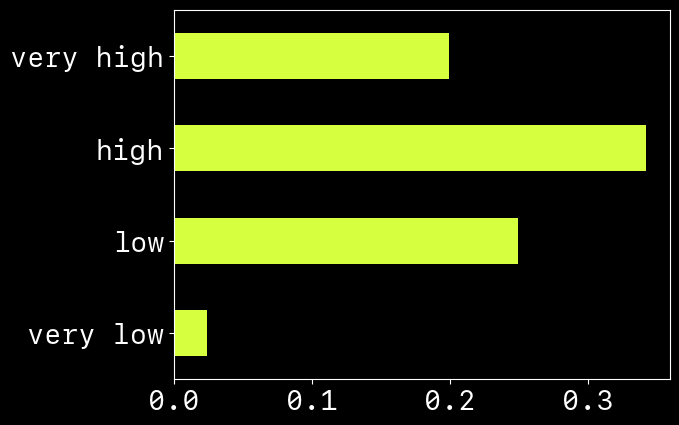

In [108]:
fig, ax = plt.subplots()
dataWithPriorExp.groupby(['_experience_category'])['_interest_change'].agg('mean').plot(kind='barh', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')

In [109]:
fig.savefig('interestChangeByExperienceCategory.png', transparent=True, dpi=300, bbox_inches='tight')

#### Knowledge Gain v/s workshop_duration

Text(0, 0.5, '')

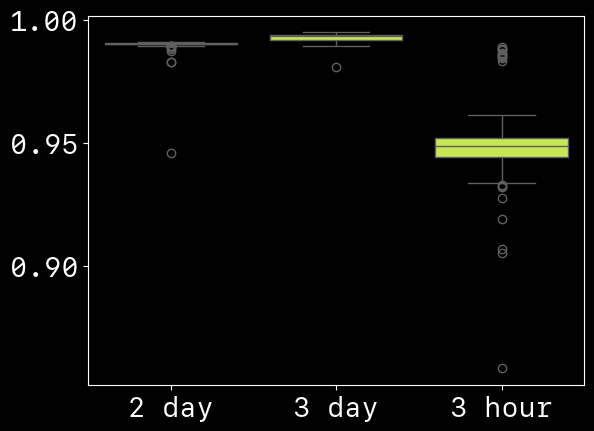

In [130]:
dataWithKnowledgeGain = data[(~data['knowledge_gain'].isna())]
fig, ax = plt.subplots()
sns.boxplot(x='workshop_duration', y='knowledge_gain', data=dataWithKnowledgeGain, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')

In [131]:
fig.savefig('knowledgeGainByDuration.png', transparent=True, bbox_inches='tight')

#### Mode v/s Satisfaction

In [132]:
dataWithSatisfaction = data[(~data['satisfaction'].isna())]

Text(0, 0.5, '')

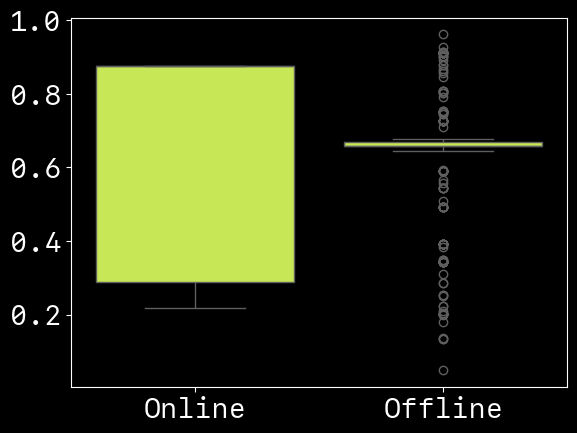

In [133]:
fig, ax = plt.subplots()
sns.boxplot(x='mode', y='satisfaction', data=dataWithSatisfaction, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')

In [134]:
fig.savefig('SatisfactionByMode.png', transparent=True, bbox_inches='tight')

In [135]:
dataWithSatisfaction.groupby(['mode'])['satisfaction'].agg(['mean'])

,mean
mode,
Offline,0.631232
Online,0.647364


In [136]:
dataWithSatisfaction\
    .query('mode == "Offline"')['satisfaction'].std()

np.float64(0.15764595825591685)

In [137]:
data['mode'].unique()

array(['Online', 'Offline'], dtype=object)

In [138]:
pd.Series(data.columns)

0                  name
1                gender
2                 class
3                  mode
4         workshop_name
5     workshop_duration
6       interest_before
7        interest_after
8            highlights
9           suggestions
10         satisfaction
11         expectations
12     prior_experience
13       knowledge_gain
dtype: object

#### interest before by class

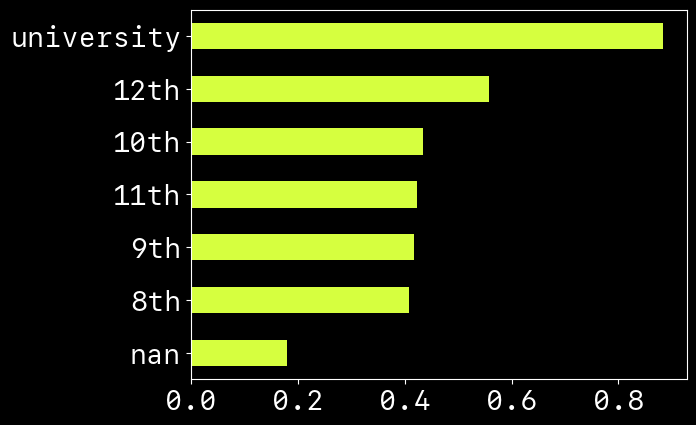

In [178]:
fig, ax = plt.subplots()
dataWithInterestVals.groupby(['class'])['interest_before'].agg(['mean']).sort_values('mean').plot(kind='barh', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend().remove()

In [179]:
fig.savefig('interestBeforeByClass.png', transparent=True, bbox_inches='tight')

#### Getting Highlights

In [142]:
dataWithHighlights = data[(~data['highlights'].isna())]

In [143]:
for highlight in list(dataWithHighlights.highlights):
    print(highlight)

basic things about robotics 
General knowledge about, robotics and coding, I guess! ~! 
ABOUT THE INTERIOR OF THE ROBOTS 
binary code 
using arduino and how to program in a block code 
HOW TO USE THE CODES 
Using arduino and ultasonic sensors with programming languages in different features 
Everything 
I have learnt many things about robotics which would be useful for my future  
using of block coding and Ultra sonic sensor 
some thing  
HARD WORK LEADS TO SUCCESS 
coding 
the laws of robots 
everything which is useful in this 
everything i learnt today 
BLOCK CODING AND DATA TYPES, BINARY CODE 
normal level of robotics 
normal level robotics 
Everthing 


In [144]:
dataWithHighlights.highlights

41                         basic things about robotics 
42    General knowledge about, robotics and coding, ...
43                    ABOUT THE INTERIOR OF THE ROBOTS 
44                                         binary code 
45    using arduino and how to program in a block code 
46                                HOW TO USE THE CODES 
47    Using arduino and ultasonic sensors with progr...
48                                          Everything 
49    I have learnt many things about robotics which...
50        using of block coding and Ultra sonic sensor 
51                                         some thing  
52                          HARD WORK LEADS TO SUCCESS 
53                                              coding 
54                                  the laws of robots 
55                  everything which is useful in this 
56                           everything i learnt today 
57            BLOCK CODING AND DATA TYPES, BINARY CODE 
58                            normal level of ro

In [145]:
dataWithInterestVals.groupby(['workshop_name'])['interest_after'].agg(['mean'])

,mean
workshop_name,
2 Day learning surveys 2024-2025 American center,0.866207
3 days Robotics Trial Workshop -St. Patrick's School 2024,0.880375


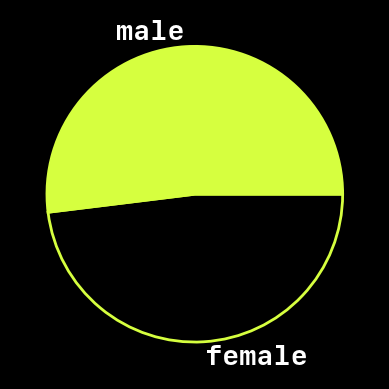

In [174]:
dataWithGender = data[(~data['gender'].isna())]
x = dataWithGender.gender.unique()
y = dataWithGender.query('gender=="male"')['gender'].count(), dataWithGender.query('gender=="female"')['gender'].count()

fig, ax = plt.subplots()
ax = plt.pie(y, 
        colors=['#d6ff3fff', '#00000000'],
        labels=['male', 'female'],
        wedgeprops={"edgecolor": "#d6ff3fff", "linewidth": 2},
        textprops={'color': 'white', 'weight': 'bold'})

In [175]:
fig.savefig('GenderRatio.png', transparent=True, dpi=300)

In [ ]:
dataWithInterestVals.query()

#### Interest After v/s class

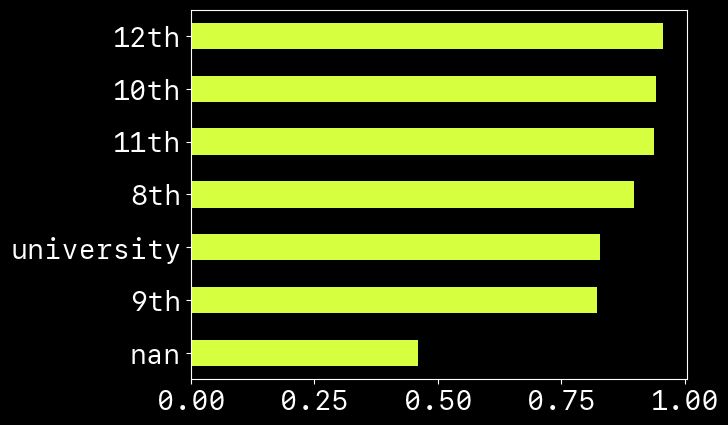

In [184]:
fig, ax = plt.subplots()
dataWithInterestVals.groupby(['class'])['interest_after'].agg(['mean']).sort_values('mean').plot(kind='barh', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend().remove()

In [185]:
fig.savefig('interestAfterByClass.png', transparent=True, bbox_inches='tight')

<Axes: ylabel='class'>

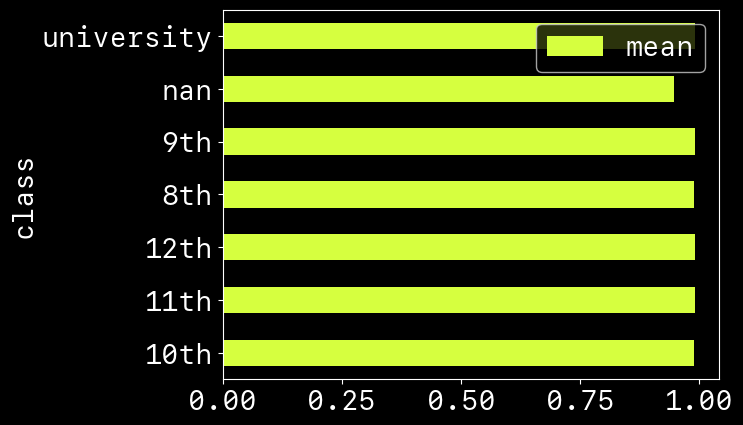

In [187]:
dataWithKnowledgeGain.groupby(['class'])['knowledge_gain'].agg(['mean']).plot(kind='barh')

In [196]:
day3knowGainMedian = dataWithKnowledgeGain.query('workshop_duration == "3 day"')['knowledge_gain'].median()
hour3knowGainMedian = dataWithKnowledgeGain.query('workshop_duration == "3 hour"')['knowledge_gain'].median()
day2knowGainMedian = dataWithKnowledgeGain.query('workshop_duration == "2 day"')['knowledge_gain'].median()

In [197]:
((day3knowGainMedian - hour3knowGainMedian)/hour3knowGainMedian) *100

np.float64(4.7071467083229885)

In [198]:
pd.Series(data.columns)

0                  name
1                gender
2                 class
3                  mode
4         workshop_name
5     workshop_duration
6       interest_before
7        interest_after
8            highlights
9           suggestions
10         satisfaction
11         expectations
12     prior_experience
13       knowledge_gain
dtype: object

In [203]:
data['_workshop_identifier'] = data.workshop_name\
    .str.replace('1 hour Online intro to Robotics workshop-pilot', '1 Hour Online Pilot')\
    .str.replace('10 day Summercamp Anna library Feedback', 'Anna Library Summer Camp')\
    .str.replace('2 Day learning surveys 2024-2025 American center', 'American Center')\
    .str.replace('3 days  Robotics Trial Workshop -St. Patrick\'s School 2024', 'St. Patrick\'s')\
    .str.replace('3 hour 2023-2024 Robotics workshop', '2023-24 3 Hour')\
    .str.replace('3 hours Open Invite 22nd April 2024 Robotics', 'Open Invite April')\
    

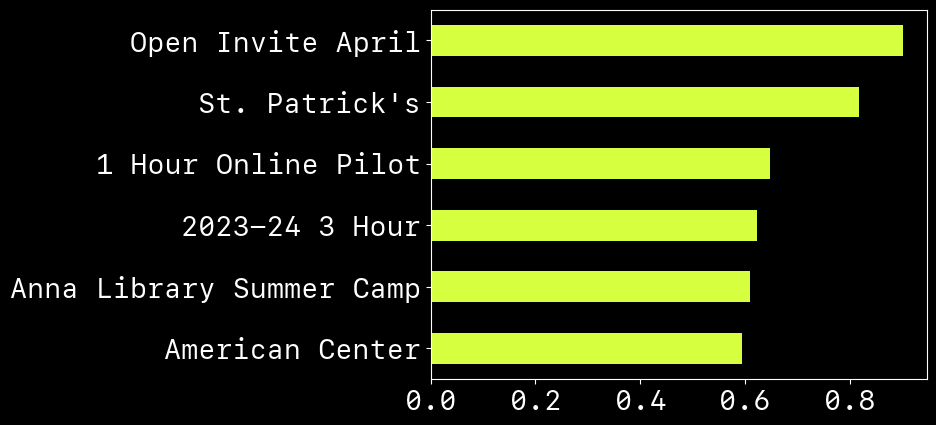

In [210]:
fig, ax = plt.subplots()
data\
    .groupby(['_workshop_identifier'])['satisfaction'].agg(['mean']).sort_values('mean').plot(kind='barh', ax = ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend().remove()

In [212]:
fig.savefig('satisfactionByWorkshop.png', transparent=True, bbox_inches='tight')